<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the initial value problem
    
$$
x'(t) + \frac{x(t)}{1+t} = -6 \, t, \quad x(0) = 3, \quad t \in [0,5],
$$
    
with a first-order ODE.
To prepare Euler's method, we rewrite the differential equation in a suitable form, i.e. we isolate the first derivative on the left hand side of the equation:

$$
x'(t) = \underbrace{-6 \, t - \frac{x(t)}{1+t}}_{\displaystyle f(t,x(t))}.
$$
    
The term on the right hand side of the equation represents the function $f$, which corresponds to the slope.
We implement this function in Python.
</div>

<div class="alert alert-block alert-warning">
With the function $f$ Euler's method can be represented as follows:
    
$$
    \begin{array}{lcl}
    \tilde{x}_{k+1} & = & \tilde{x}_k + h \cdot f(t_k,\tilde{x}_k) \\
    t_{k+1}         & = & t_k + h
    \end{array}
$$

The values $t_k$ are equaly spaced and can be generated in Python by `numpy.arange()`. 
The approximate values $\tilde{x}_k$ are calcuklated step by step and stored in a one dimensional array, which is initialized by zeors using `numpy.zeros()`.
The size of those arrays is determined by

$$
    n = \frac{t_n - t_0}{h} \, .
$$
</div>

t =  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
x =  [  3.           2.4          1.76         1.02857143   0.18
  -0.8         -1.92        -3.18545455  -4.6         -6.16615385
  -7.88571429  -9.76       -11.79       -13.97647059 -16.32
 -18.82105263 -21.48       -24.29714286 -27.27272727 -30.40695652
 -33.7        -37.152      -40.76307692 -44.53333333 -48.46285714
 -52.55172414]


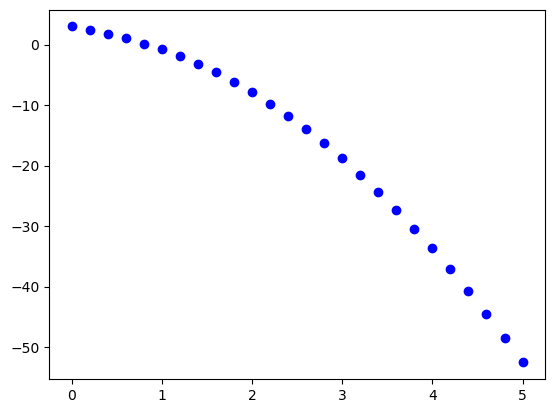

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,x):
    f = -6*t-x/(1+t)
    return f

def euler(t0,tn,h,x0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for k in range(n):
        x[k+1] = x[k]+h*f(t[k],x[k])
    return t, x

t0 = 0.0
tn = 5.0
h = 0.2
x0 = 3.0
t, x = euler(t0,tn,h,x0)
print('t = ',t)
print('x = ',x)

# plot it
fig, ax = plt.subplots()
ax.plot(t,x,'ob')

<div class="alert alert-block alert-warning">

<b>Example 2</b>

Apply Euler's method to the first-order differential equation

$$
t \, x'(t) = (1 - t) \, x(t), \quad x(1) = 1, \quad t \in [1,3].
$$
</div>

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$x$')]

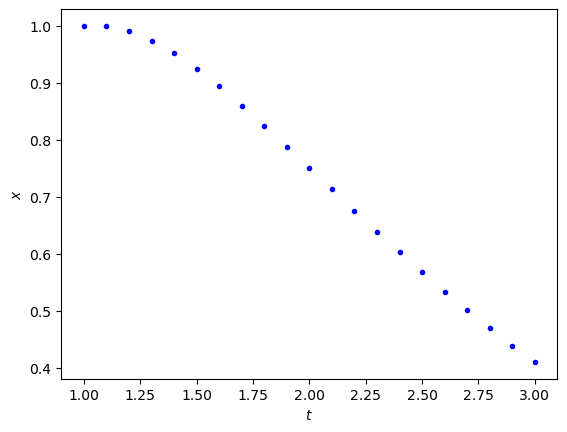

In [2]:
def f(t,x):
    f = (1.0-t)*x/t
    return f

def euler(t0,tn,h,x0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for k in range(n):
        x[k+1] = x[k]+h*f(t[k],x[k])
    return t, x
    
t0 = 1.0
tn = 3.0
h = 0.1
x0 = 1.0
t, x = euler(t0,tn,h,x0)

fig, ax = plt.subplots(1,1)
ax.plot(t,x[:],'.b')
ax.set(xlabel='$t$', ylabel='$x$')
#plt.savefig("euler1.png")

<div class="alert alert-block alert-info">

<b>Example 3</b>
    
Apply Euler's method to the second-order equation

$$
x''(t) + 2(1 + x(t)^2)x'(t) + 4 \, x(t) = \cos ( 3\, t), \quad x(0) = 0, \quad x'(0) = 1, \quad t \in [0,1].
$$
</div>

[Text(0.5, 0, '$x(t)$'), Text(0, 0.5, "$x'(t)$")]

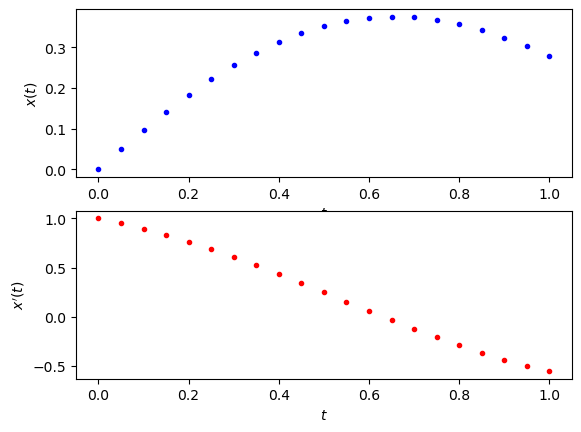

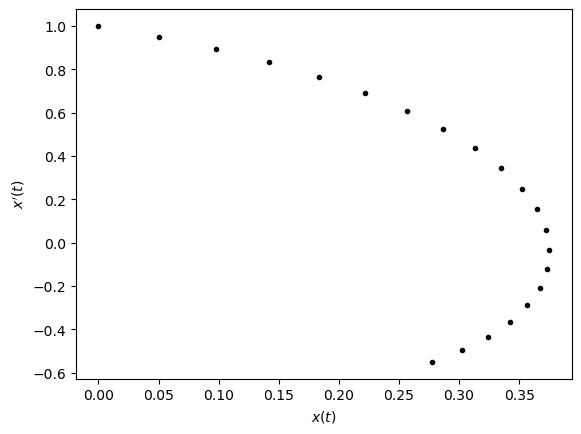

In [6]:
def f2(t,z):
    f2 = np.array([z[1],-2.0*(1.0+z[0]**2)*z[1]-4.0*z[0]+np.cos(3.0*t)])
    return f2

def euler2(t0,tn,h,z0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    z = np.zeros([len(z0),n+1])
    z[:,0] = z0
    for k in range(n):
        z[:,k+1] = z[:,k]+h*f2(t[k],z[:,k])
    return t, z

#Parameter
t0 = 0.0
tn = 1.0
h = 0.05
z0 = np.array([0.0,1.0])
t, z = euler2(t0,tn,h,z0)

fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,z[0,:],'.b')
ax1.set(xlabel='$t$', ylabel='$x(t)$')
ax2.plot(t,z[1,:],'.r')
ax2.set(xlabel='$t$', ylabel="$x'(t)$")
#plt.savefig("euler2a.png")
        
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'.k')
ax.set(xlabel='$x(t)$', ylabel="$x'(t)$")
#plt.savefig("euler2b.png")

<div class="alert alert-block alert-warning">
    
<b>Example 4</b>

Let us consider the initial value problem
    
$$
x''(t) + x'(t) + \sin \left( x(t) \right) = \cos(t), \quad x(0) = 3, \quad x'(0) = 0, \quad t \in [0,6 \, \pi],
$$

[Text(0.5, 0, '$x(t)$'), Text(0, 0.5, "$x'(t)$")]

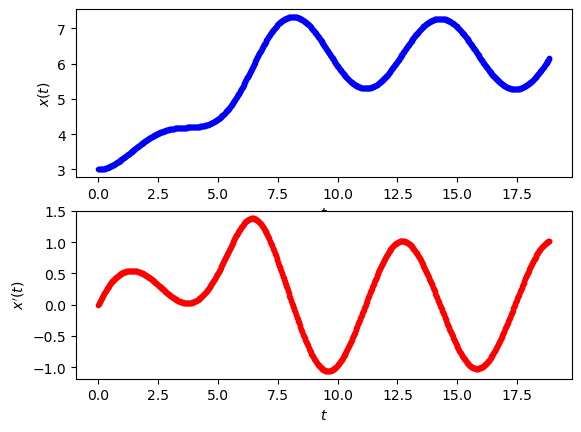

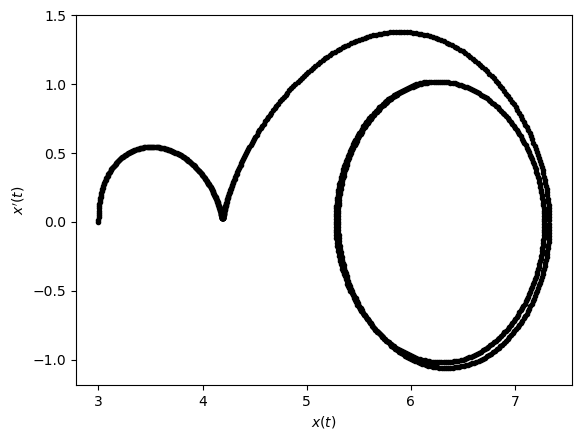

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f2(t,z):
    f2 = np.array([z[1],-1.0*z[1]-np.sin(z[0])+np.cos(1.0*t)])
    return f2

def euler2(t0,tn,h,z0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    z = np.zeros([len(z0),n+1])
    z[:,0] = z0
    for k in range(n):
        z[:,k+1] = z[:,k]+h*f2(t[k],z[:,k])
    return t, z

#Parameter
t0 = 0.0
tn = 6.0*np.pi
h = 0.02
z0 = np.array([3.0,0.0])
t, z = euler2(t0,tn,h,z0)

fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,z[0,:],'.b')
ax1.set(xlabel='$t$', ylabel='$x(t)$')
ax2.plot(t,z[1,:],'.r')
ax2.set(xlabel='$t$', ylabel="$x'(t)$")
#plt.savefig("euler2a.png")
        
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'.k')
ax.set(xlabel='$x(t)$', ylabel="$x'(t)$")
#plt.savefig("euler2b.png")

<div class="alert alert-block alert-info">

<b>Example 5</b>

<div class="alert alert-block alert-info">

    
Apply Euler's method to the second-order equation

$$
x''(t) =  -100(x'(t)x^2(t) - B \, x'(t) + x(t) - L0) , \ B = 1.0, L0 = 0.5, \quad x(0) = 0.6, x'(0) = 0.0.
$$
</div>

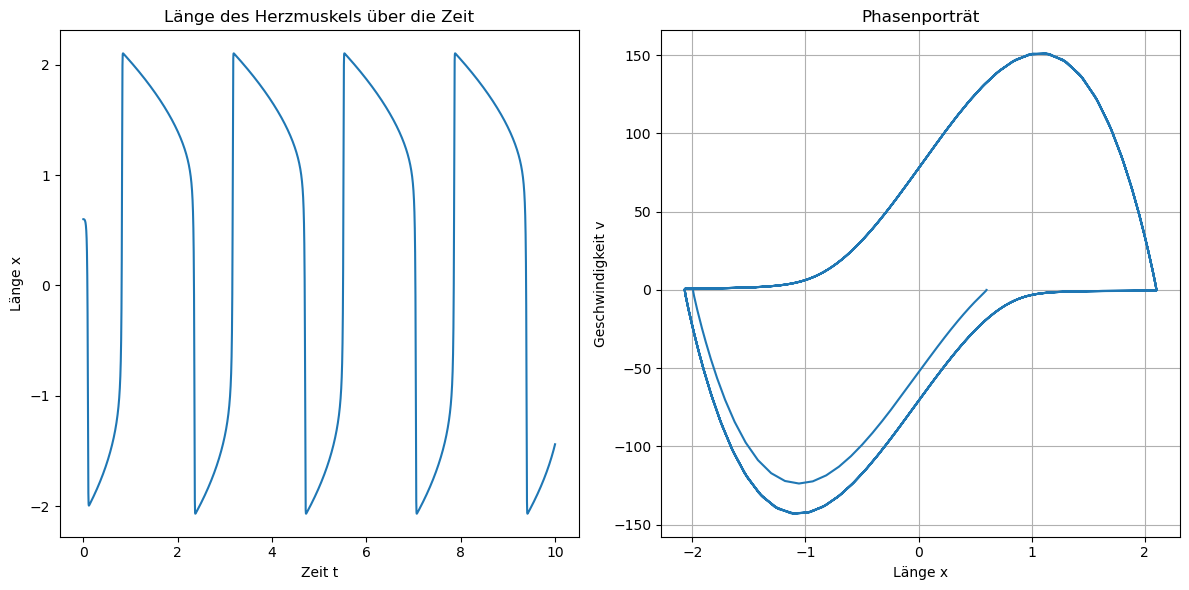

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Funktionen für die gewöhnliche Differenzialgleichung
def f(x, v, t, B, Lo):
    return -100 * (v*x**2 - B*v + x - Lo)

def g(x, v, t):
    return v

# Parameter
B = 1.0
Lo = 0.5
x0 = 0.6
v0 = 0.0
h = 0.001
t_max = 10

# Arrays für die Zeit, die Werte von x und v
t_values = np.arange(0, t_max, h)
x_values = np.zeros_like(t_values)
v_values = np.zeros_like(t_values)

# Anfangswerte setzen
x_values[0] = x0
v_values[0] = v0

# Euler-Verfahren
for i in range(1, len(t_values)):
    x_values[i] = x_values[i-1] + h * g(x_values[i-1], v_values[i-1], t_values[i-1])
    v_values[i] = v_values[i-1] + h * f(x_values[i-1], v_values[i-1], t_values[i-1], B, Lo)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))

# Länge des Herzmuskels x in Abhängigkeit von der Zeit t
plt.subplot(1, 2, 1)
plt.plot(t_values, x_values, label='Länge des Herzmuskels')
plt.xlabel('Zeit t')
plt.ylabel('Länge x')
plt.title('Länge des Herzmuskels über die Zeit')

# Phasenporträt: Verlauf der Geschwindigkeit v über der Länge des Herzmuskels x
plt.subplot(1, 2, 2)
plt.plot(x_values, v_values, label='Phasenporträt')
plt.xlabel('Länge x')
plt.ylabel('Geschwindigkeit v')
plt.title('Phasenporträt')
plt.grid(True)

plt.tight_layout()
plt.show()
